# Econometric 322 Lab \#3

Collaboration Policy

    1. Study groups are allowed but I expect students to understand and complete their own 
    assignments and to hand in one assignment per student.
    2. If you worked in a group, please put the names of your study group on your assignment 
    on top.
    3. Just like all other classes at Rutgers, the student Honor Code is taken seriously.
    
    The submitted assignmenst must be your work.

## <font color = blue> Assignment </font>

Collect data on the following:

- Physicians and nurses by state

Use the reference in Lesson 3.

# <font color = red> Documentation </font>

## <font color = blue> Abstract </font>

*In this lab I observed the distribution of Physicians per state in the United States. Specifically, the distribution is not Normal. It is skewed to the right. This makes sense, as states with larger populations have larger quantities of Physicians, and the distribution of states is also skewed.*

## <font color = blue> Data Dictionary </font>

| Variable | Values   | Source | Mnemonic |
|----------|----------|--------|---------|
|  Physicians Per State | 1000s of Physicians | US Census Statistical Abstract of the United States: 2012 Section 3 Health and Nutrition | Phys |
| Physicians per 100000 Per State | Physicians per 100000 People | US Census Statistical Abstract of the United States: 2012 Section 3 Health and Nutrition | Phys100k |
| Nurses Per State | 1000s of Nurses | US Census Statistical Abstract of the United States: 2012 Section 3 Health and Nutrition | Nurs |
| Nurses Per 100000 Per State | Nurses per 100000 People | US Census Statistical Abstract of the United States: 2012 Section 3 Health and Nutrition | Nurs100k |
| State Population | 1000s of Individuals | American FactFinder Annual Estimates of the Resident Population for Selected Age Groups by Sex for the United States, States, Counties, and Puerto Rico Commonwealth and Municipios: April 1, 2010 to July 1, 2012 Population Estimates | Pop |
| Region | Name of Region | US Census 2010 Geographic Terms and Concepts - Census Divisions and Census Regions | Region |
| Division (Each Region can be further broken up into Divisions) | Name of Division | US Census 2010 Geographic Terms and Concepts - Census Divisions and Census Regions | Division |

# <font color = red> Pre-lab Questions </font>

Before you do any work, please think about the relationship among these macro variables. In particular, think how you would answer the following if called on in class:

## <font color = blue> What type of data is this and why (i.e., source and domain)? </font>

This is cross-sectional data, because we're comparing a few things at the same point in time. It is secondary data, because it is based on information collected by observational studies by the government.

## <font color = blue> What pattern do you expect to see for physicians by state?  Explain your answer. </font>

I expect states with larger to have larger quantities of physicians. Larger populations will require more physicians than smaller populations, holding all else equal. While different demographic factors may make some types of doctors more or less common (I would imagine Geriatric care is very big in Florida), physicians are useful for almost everyone, and I imagine that the ratio of physicians to poulation would remain fairly constant across states.

## <font color = blue> What should you do to the physician and nurse data before you do any analytical work? </font>

The numbers must be scaled. Currently, the data has the quantity of nurses and physicians. So the numbers don't get too large and unworkable, we need to divide them by 1000. This has already been done for state population (its already in units of 1000) so we don't have to worry about consistency.

# <font color = red> Tasks and Questions </font>

## <font color = blue> Load the Pandas and Seaborn packages and give them aliases.  I recommend 'pd' and 'sns'. </font>

In [399]:
##
## Enter the code here
##
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## <font color = blue> Import the physician and nurse data.  Set the row index to the state names. </font>

In [400]:
##
## Enter the code here
##
dfmed=pd.read_csv("med.csv",index_col="State")

## <font color = blue> Print the first five (5) records. </font>

In [401]:
##
## Enter the code here
##
dfmed.head()

,Phys,Phys100k,Nurs,Nurs100k
State,,,,
Alabama,10265.0,218.0,42880.0,911.0
Alaska,1574.0,225.0,5010.0,717.0
Arizona,14051.0,213.0,38570.0,585.0
Arkansas,5902.0,204.0,23050.0,798.0
California,100131.0,271.0,233030.0,630.0


## <font color = blue> Import the state information (see Lesson \#3).  Set the row index to the state names.</font>

In [402]:
##
## Enter the code here
##
dfstate=pd.read_csv("states2010.csv",index_col="State")

## <font color = blue> Print the first five (5) records. </font>

In [403]:
##
## Enter the code here
##
dfstate.head()

,Pop,Region,Division
State,,,
Alabama,4780,South,East South Central
Alaska,710,West,Pacific
Arizona,6392,West,Mountain
Arkansas,2916,South,West South Central
California,37254,West,Pacific


## <font color = blue> Merge the physician/nurse data and the state data as described in Lesson \#3. </font>

In [404]:
##
## Enter the code here
##
result = pd.merge( dfmed, dfstate, left_index = True, right_index = True, how = 'inner' )
result.shape

(51, 7)

## <font color = blue>Recall your answer to the question above regarding what you should do to the physician and nurse data before you do any analytical work.  Make the correction here.   Be sure to use the corrected data for the following tasks.</font>

In [405]:
##
## Enter the code here
##
result["Phys"]=result["Phys"]/1000
result["Nurs"]=result["Nurs"]/1000
result["Pop"]=result["Pop"]/1000

## <font color = blue> Create summary statistics for the physician and nurse data. </font>

In [406]:
##
## Enter the code here
##
result["Phys"].describe()

count     51.000000
mean      16.440255
std       19.257689
min        1.020000
25%        4.655500
50%       10.403000
75%       21.600000
max      100.131000
Name: Phys, dtype: float64

In [407]:
result["Nurs"].describe()

count     51.000000
mean      50.662157
std       49.553464
min        4.700000
25%       13.870000
50%       38.020000
75%       62.055000
max      233.030000
Name: Nurs, dtype: float64

In [408]:
result["Pop"].describe()

count    51.000000
mean      6.053843
std       6.824019
min       0.564000
25%       1.697000
50%       4.339000
75%       6.636500
max      37.254000
Name: Pop, dtype: float64

## <font color = blue> Plot the physician and nurse data using graphs you learned in Stat 101. </font>

Text(0,0.5,'1000s of Nurses')

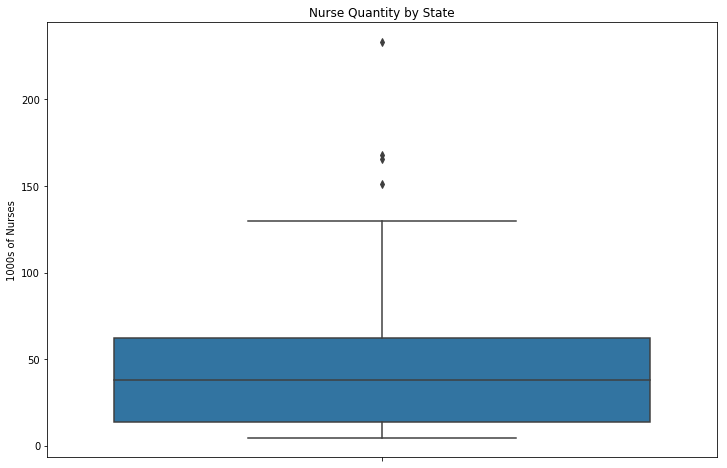

In [409]:
##
## Enter code here.  You can insert more code cells for more graphs below 
## this one by clicking on the thick edge to the far left and hitting the b 
## key or by just clicking on the + sign on the menu bar.  Create as many graphs as you need.
##
plt.title("Nurse Quantity by State")
plt.gcf().set_size_inches(12,8)
ax = sns.boxplot( y = "Nurs", data = result )
plt.ylabel("1000s of Nurses")

Text(0,0.5,'1000s of Physicians')

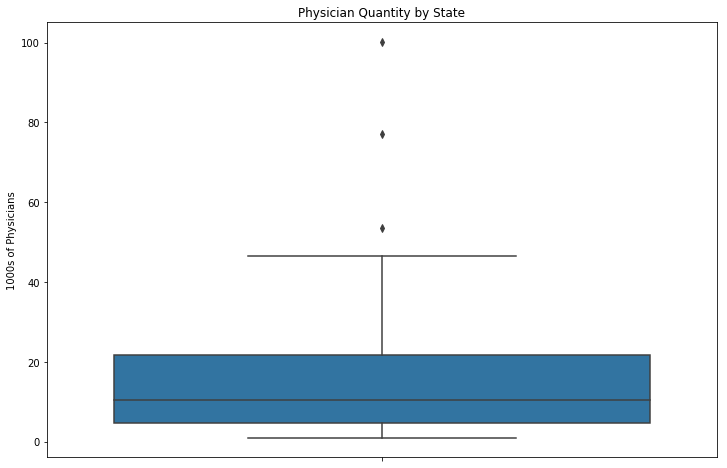

In [410]:
plt.title("Physician Quantity by State")
plt.gcf().set_size_inches(12,8)
ax = sns.boxplot( y = "Phys", data = result )
plt.ylabel("1000s of Physicians")

Text(0.5,0,'State Population in 100,000s of persons')

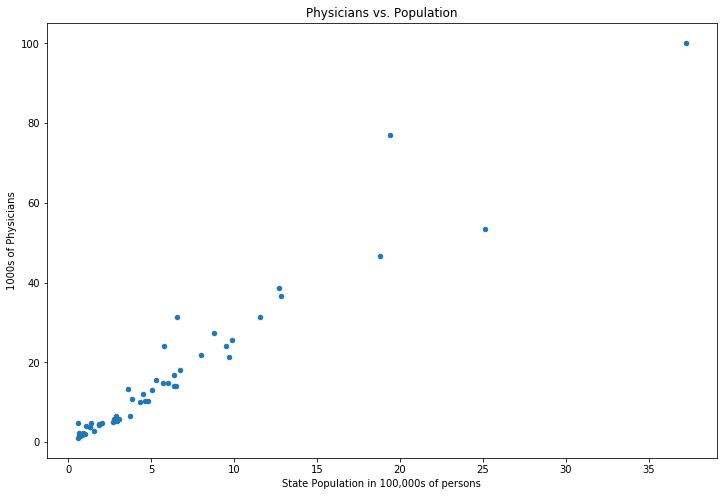

In [411]:

#ax=sns.scatterplot(x="Pop",y="Phys",data=result)
result.plot.scatter(x="Pop",y="Phys",title="Physicians vs. Population")
plt.gcf().set_size_inches(12,8)
plt.ylabel("1000s of Physicians")
plt.xlabel("State Population in 100,000s of persons")

Text(0.5,0,'State Population in 100,000s of persons')

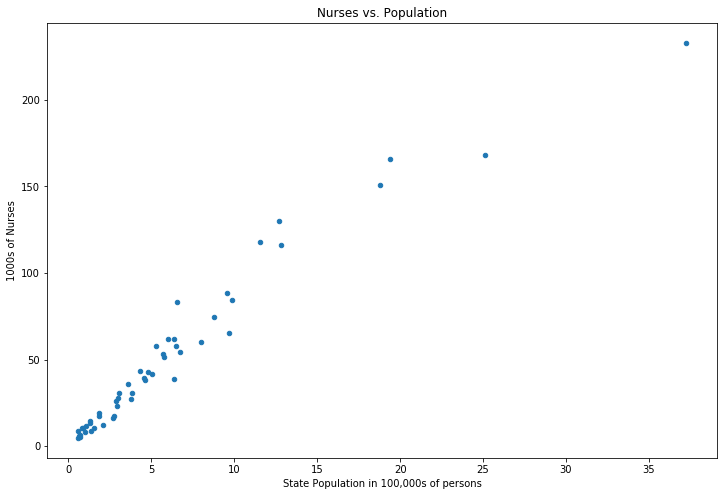

In [412]:
result.plot.scatter(x="Pop",y="Nurs",title="Nurses vs. Population")
plt.gcf().set_size_inches(12,8)
plt.ylabel("1000s of Nurses")
plt.xlabel("State Population in 100,000s of persons")

## <font color = blue> Plot the physicians by region.  What graph type would you use? </font>

In [413]:
##
## Enter the code here
##
oldRes=result.copy(deep=True)
result.set_index("Division")
resultDiv=result.reset_index().groupby("Division").sum()

Text(0.5,0,'Division Population in 100,000s of persons')

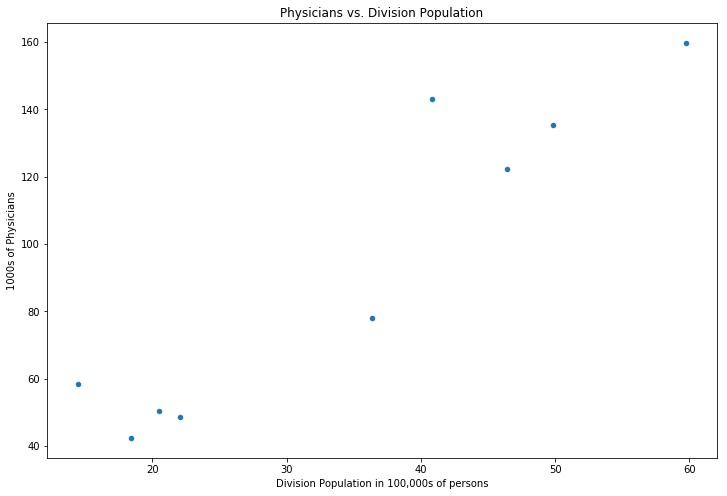

In [414]:
resultDiv.plot.scatter(x="Pop",y="Phys",title="Physicians vs. Division Population")
plt.gcf().set_size_inches(12,8)
plt.ylabel("1000s of Physicians")
plt.xlabel("Division Population in 100,000s of persons")

Text(0,0.5,'1000s of Physicians')

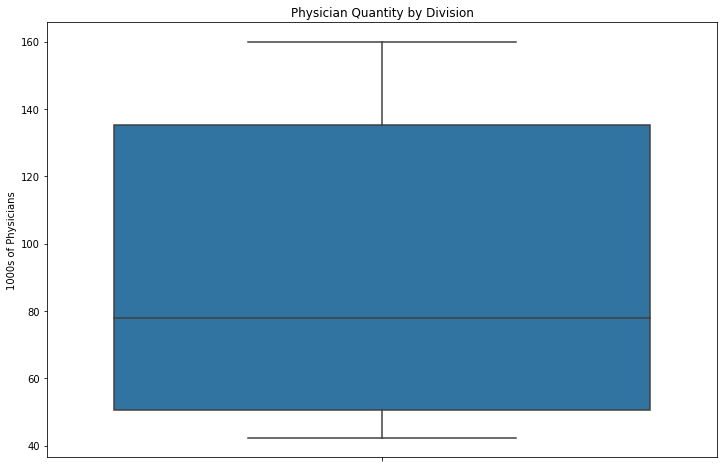

In [415]:
plt.title("Physician Quantity by Division")
plt.gcf().set_size_inches(12,8)
ax = sns.boxplot( y = "Phys", data = resultDiv )
plt.ylabel("1000s of Physicians")

In [416]:
result.set_index("Region")
resultReg=result.reset_index().groupby("Region").sum()

Text(0.5,0,'Region Population in 100,000s of persons')

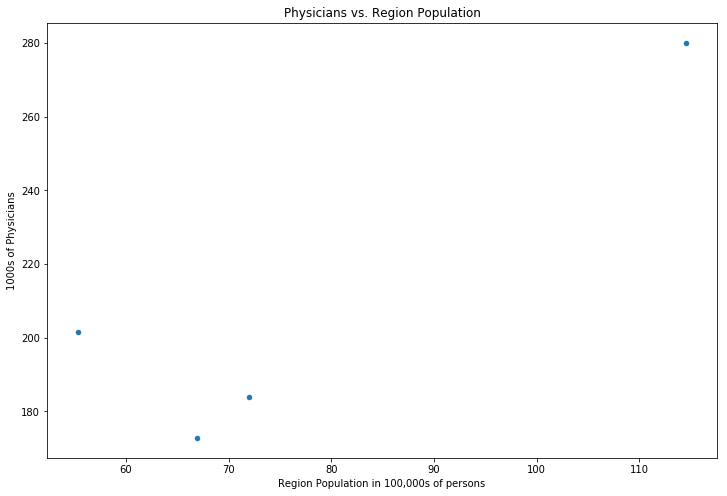

In [417]:
resultReg.plot.scatter(x="Pop",y="Phys",title="Physicians vs. Region Population")
plt.gcf().set_size_inches(12,8)
plt.ylabel("1000s of Physicians")
plt.xlabel("Region Population in 100,000s of persons")

Text(0,0.5,'1000s of Physicians')

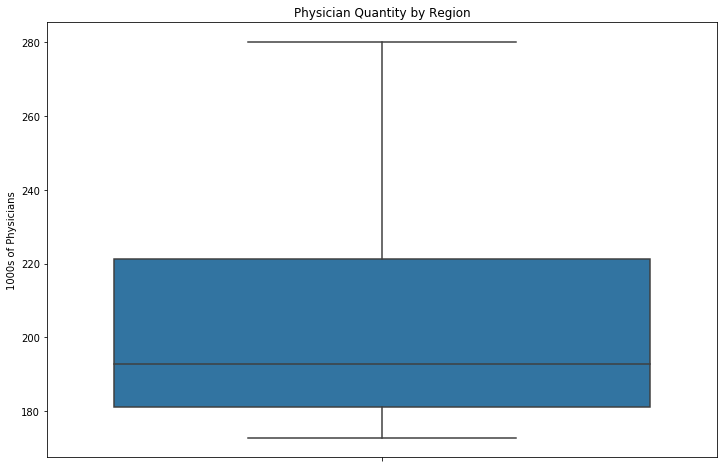

In [418]:
plt.title("Physician Quantity by Region")
plt.gcf().set_size_inches(12,8)
ax = sns.boxplot( y = "Phys", data = resultReg )
plt.ylabel("1000s of Physicians")

## <font color = blue> Print and graph a correlation matrix. </font>

In [419]:
##
## Enter the code here
##
oldRes.corr()

,Phys,Phys100k,Nurs,Nurs100k,Pop
Phys,1.000000,0.126006,0.967637,-0.200813,0.965205
Phys100k,0.126006,1.000000,0.043567,0.545515,-0.012314
Nurs,0.967637,0.043567,1.000000,-0.166072,0.970034
Nurs100k,-0.200813,0.545515,-0.166072,1.000000,-0.291864
Pop,0.965205,-0.012314,0.970034,-0.291864,1.000000


## <font color = blue> Plot a histogram of physicians. </font>

/Users/jamesbaker/miniconda3/envs/py3k/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Relative Frequency of Quantity of Physicians')

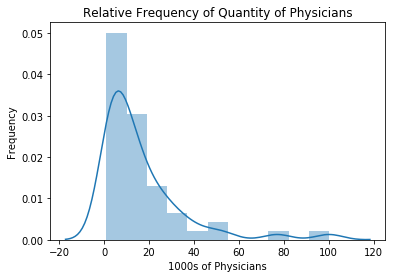

In [420]:
##
## Enter the code here
##
sns.distplot(oldRes["Phys"])
plt.xlabel("1000s of Physicians")
plt.ylabel("Frequency")
plt.title("Relative Frequency of Quantity of Physicians")

## <font color = blue> Perform a normality test of the physicians distribution. </font>

### D’Agostino-Pearson Omnibus Test

$H_O$: The data is normally distributed <br>
$H_A$: The data is not normally distributed <br>
Explanation for Alternative Hypothesis: This data would not be normally distributed because the data looks to be very skewed to the right. <br>
Because *n* > 20, we can do a D’Agostino-Pearson Omnibus Test included in the scipy.stats library with $\alpha$ =0.01 <br>

In [421]:
##
## Enter the code here
##
from scipy import stats
p=stats.normaltest(oldRes["Phys"]).pvalue
print(p)

1.9256745196821795e-10


$\alpha$ =0.01 > *p-value* = 1.9256745196821795e-10 <br>
Because $\alpha$ > *p-value*, we can reject the Null Hypothesis and say the data is not normally distributed.

### Andersen Test

$H_O$: The data is normally distributed <br>
$H_A$: The data is not normally distributed <br>
Explanation for Alternative Hypothesis: This data would not be normally distributed because the data looks to be very skewed to the right. <br>

In [422]:
from scipy.stats import anderson
res = anderson(oldRes["Phys"])
print('Test Statistic: %.3f' % res.statistic)
print( 'Significance Level: ',  res.significance_level )
print( 'Critical Values: ',  res.critical_values )

Test Statistic: 4.130
Significance Level:  [15.  10.   5.   2.5  1. ]
Critical Values:  [0.539 0.614 0.736 0.859 1.022]


For every significance level, the Test Statistic > Critical Values. Thus, we can reject the Null Hypothesis and say the distribution of Physicians is not normally distributed.

### Andersen Test for Nurses

$H_O$: The data is normally distributed <br>
$H_A$: The data is not normally distributed <br>
Explanation for Alternative Hypothesis: This data would not be normally distributed because the data is very clustered at the bottom of the distribution, as can be seen on the scatterplot. <br>

In [423]:
res = anderson(oldRes["Nurs"])
print('Test Statistic: %.3f' % res.statistic)
print( 'Significance Level: ',  res.significance_level )
print( 'Critical Values: ',  res.critical_values )

Test Statistic: 2.959
Significance Level:  [15.  10.   5.   2.5  1. ]
Critical Values:  [0.539 0.614 0.736 0.859 1.022]


For every significance level, the Test Statistic > Critical Values. Thus, we can reject the Null Hypothesis and say the distribution of Nurses is not normally distributed.

# <font color = red> Post-Lab Questions </font>

## <font color = blue> Interpret the summary statistics. </font>

Physicians<br>
There were 51 different States in our sample. The mean of our sample was 16.440225, meaning the average State in 2012 had 16440 Physicians (Rounded because you can't have 0.225 Physicians). The Standard Deviation of the sample was 19.257689, and the Range was 99.111. The distribution was skewed to the right and not normal.<br>
Nurses<br>
There were 51 different States in our sample. The mean of our sample was 50.662157, meaning the average State in 2012 had 50662 Nurses (Rounded because you can't have 0.157 Nurses). The Standard Deviation of the sample was 49.553464, and the Range was 228.33. The distribution was not normal. <br>
The distribution of Nurses had a higher average. The Distribution of Nurses had both a higher spread and higher standard deviation than the Distribution of Physicians


## <font color = blue> Interpret the graphs.  What do they tell you about the distribution of physicians around the country? </font>

The scatterplot gives the appearance that states with larger overall populations have larger Physician populations. The State scatterplot also shows the distribution is concentrated close to 0, with a few large outliers. The Region scatterplot also has a cluster close to 0, with the South being far in the top right corner due to its large population and large population of Physicians.

## <font color = blue> What are the Null and Alternative Hypotheses for the normality test of physicians? Explain your answer. </font>

The Null Hypothesis is the Hypothesis that physicians are normally distributed around the mean. It is what is assumed by default until falsified and rejected. The Alternative Hypothesis is the Hypothesis that Physicians are not Normally Distributed. 

## <font color = blue> Are physicians normally distributed?  That is, do you reject or fail to reject your Null Hypothesis?  Explain you answer. </font>

We rejected the Null Hypothesis. For every significance level, the Test Statistic > Critical Value. Thus, we can reject the Null Hypothesis, regardless of significance level and say the distribution of Physicians is not normally distributed.

## <font color = blue> What can you observe about the correlation matrix? Explain. </font>

The strongest positive correlation is between Nurses and Population (R=0.970034). The Correlation between Physicians and Population is also very strong (R=0.965205). This confirms the pattern seen in the graphs, where there appears to be a trend where more populous states have greater quantities of doctors. The weakest positive correlation is between Nurses and Physicians per 100,000 people (R=0.043567). The strongest negative correlation was between Population and Nurses per 100,000 (R=-0.291864). The weakest negative correlation is between Physicians per 100,000 and Population (R=-0.012314). The only negative correlations were present when one of the variables was Nurses per 100,000 or Physicians per 100,000.